<a href="https://colab.research.google.com/github/mbp-lab/Neural-Networks-HCAI/blob/main/2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression
## Apartment Price Prediction
### Read in the Data

The first two cells below, you can simply run - they provide a starting point.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Define the dataset
data = [
    {"size": 19, "price": 380, "rooms": 1, "distance_to_center": 6, "location": "Stieghorst"},
    {"size": 32, "price": 450, "rooms": 1, "distance_to_center": 4, "location": "Schildesche"},
    {"size": 69, "price": 750, "rooms": 3, "distance_to_center": 3, "location": "Heepen"},
    {"size": 60, "price": 800, "rooms": 2, "distance_to_center": 4.5, "location": "Dornberg"},
    {"size": 20, "price": 420, "rooms": 1, "distance_to_center": 1, "location": "Mitte"},
    {"size": 18, "price": 580, "rooms": 1, "distance_to_center": 2, "location": "Gadderbaum"},
    {"size": 52, "price": 700, "rooms": 3, "distance_to_center": 0.5, "location": "Innenstadt"},
    {"size": 45, "price": 1500, "rooms": 2, "distance_to_center": 1.5, "location": "Jöllenbeck"},
    {"size": 50, "price": 1600, "rooms": 2, "distance_to_center": 1, "location": "Sennestadt"}
]

# Step 1: Extract the features (size and distance_to_center) and target (price) from the dictionaries
sizes = np.array([apt['size'] for apt in data])  # Feature 1: size of the apartment
distances = np.array([apt['distance_to_center'] for apt in data])  # Feature 2: distance to city center
prices = np.array([apt['price'] for apt in data])  # Target variable: price of the apartment
rooms = np.array([apt['rooms'] for apt in data])  # Target variable: price of the apartment

# Step 2: Create the input matrix X with a column of 1s for the intercept
X = np.column_stack((np.ones(sizes.shape[0]), sizes, distances))
# X = np.column_stack((sizes, distances))
Y = np.column_stack((prices, rooms))

print(X[:,0].shape, Y.shape)
print("Input: ", X[:,1])
print("Output: ", Y[:,0])

(9,) (9, 2)
Input:  [19. 32. 69. 60. 20. 18. 52. 45. 50.]
Output:  [ 380  450  750  800  420  580  700 1500 1600]


In [2]:
def mean_squared_error(y_true, y_pred):
    """
    Calculate the Mean Squared Error between the actual and predicted values.

    Parameters:
    - y_true: array-like, actual values (ground truth)
    - y_pred: array-like, predicted values

    Returns:
    - mse: float, the mean squared error
    """
    # Ensure inputs are NumPy arrays for element-wise operations
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate the squared differences
    squared_differences = (y_true - y_pred) ** 2

    # Return the mean of the squared differences
    mse = np.mean(squared_differences)
    return mse

---

## 2.1 Gradient Descent

When manually adjusting the slope and intercept (in the last tasks of the preceding week) using sliders to find a good fit for a linear regression model, you're essentially trying to minimize the error (in this case, the Mean Squared Error (MSE)) between the predicted values and the actual values. Instead of adjusting parameters manually, we can automate this process using an iterative algorithm like gradient descent, which is commonly used for optimizing functions.

### Concept of Gradient Descent for Linear Regression

Gradient descent is an optimization algorithm used to minimize a cost function (in this case, MSE). It works by iteratively adjusting the parameters (slope and intercept) in the direction of the steepest descent (i.e., the negative gradient of the cost function) until it finds a local minimum.

How Gradient Descent Works:

1. Initialize the parameters: Start with some initial values for the slope $(m)$ and intercept $(b)$.
2. Compute the error (MSE): Calculate the MSE for the current parameters.
3. Update the parameters: Change the parameters in such a way that the MSE is getting smaller. You can use the gradients (partial derivatives) of the cost function with respect to $m$ and $b$ to adjust the parameters in small steps. The size of the step is controlled by a learning rate $(\alpha)$.
4. Repeat: Continue updating the parameters iteratively until the error stops decreasing (i.e., converges).

In the two following tasks, you will go through these four steps. Only step three will be different in the two versions.

**First sub-task: Brute-force search for better parameters**

Tasks:

* Start with (small) initial values;
* Compute error for current parameters;
* For each of the parameter: slightly adjust each parameter individually and compute after each small adaptation the MSE again. If the error decreased, stick with the newly selected parameter.
* repeat ...

This approach is simpler than gradient descent but still allows you to iteratively find a better solution by trying out small adjustments to the parameters. You can fine-tune the step size and the number of iterations to balance between speed and accuracy.

In [ ]:
# As a starting point, this is the old SimpleLinearModel
# Your Task is to replace the simple calculation of a slope
# and implement gradient descent on all the training data
class SimpleGradientDescentModel:
    """
    A simple linear regression model that performs gradient descent manually.
    It loops over each example, adjusts the slope (m) and intercept (b),
    and calculates the gradient manually to update the parameters.
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.slope = 0.
        self.intercept = 0.
        # NEW: We introduce a learning rate - this is how much
        # (ideally as a scalign factor) we change in each iteration the weights of our model
        # into the direction that the error is getting smaller.
        # Should be a small value.
        self.learning_rate = learning_rate  # Set learning rate for gradient descent
        # NEW: Number of iterations to run gradient descent
        self.n_iterations = n_iterations  # Set number of iterations for gradient descent
        self.mse_history = []  # List to store MSE at each iteration

    def set_params(self, m, b):
        """Set slope (m) and intercept (b) directly."""
        self.slope = m  # Set slope
        self.intercept = b  # Set intercept

    def fit(self, X, y):
        """
        Fit the model using gradient descent. Adjust slope and intercept iteratively.

        Parameters:
        X : list or array-like, shape (n_samples,)
            The independent variable (e.g., size of apartments).
        y : list or array-like, shape (n_samples,)
            The dependent variable (e.g., price of apartments).
        """

        # We run this in a loop for n_iterations
        for i in range(self.n_iterations):
            # Initially, you also can iterate over the trainings data in a loop as well
            y_pred = self.slope * X + self.intercept
            current_mse = mean_squared_error(y_pred=y_pred, y_true=y)
            self.mse_history.append(current_mse)
            
            new_m = self.slope + self.learning_rate
            new_y_pred_m = new_m * X + self.intercept
            new_mse_m = mean_squared_error(y, new_y_pred_m)
            
            # If the error decreased, accept the new slope
            if new_mse_m < current_mse:
                self.slope = new_m
                current_mse = new_mse_m
            
            # Try adjusting the intercept (b) by a small amount
            new_b = self.intercept + self.learning_rate
            new_y_pred_b = self.slope * X + new_b
            new_mse_b = mean_squared_error(y, new_y_pred_b)
            
            # If the error decreased, accept the new intercept
            if new_mse_b < current_mse:
                self.intercept = new_b
                current_mse = new_mse_b



            if i % 100 == 0:
                print(f"Iteration {i:4}: MSE = {self.mse_history[-1]:8.2f}, m = {self.slope:.4f}, b = {self.intercept:.4f}")

    def predict(self, X):
        """
        Predict method for making predictions using the trained model.

        Parameters:
        X : list or array-like, shape (n_samples,)
            New data (independent variable) to predict the dependent variable.

        Returns:
        predictions : list
            Predicted values based on the model's slope and intercept.
        """
        # Use the line equation y = mx + b to generate predictions
        return [self.slope * x + self.intercept for x in X]
    

    def get_mse_history(self):
        return self.mse_history



### Visualization of learning

A training curve shows how the error developed during training (it should go down). In this case, the MSE is used and decreases significantly during the early iterations as the model adjusts the slope and intercept to minimize the error. After a certain number of iterations, the MSE stabilizes and no longer decreases, indicating that the model has reached a relatively optimal solution.

Characteristics of a training / learning curve:

* Monitoring Convergence: The training curve helps to visualize whether the model is converging, i.e., if the error is decreasing as the number of iterations increases. A flat curve after some iterations suggests that the model has likely converged to a solution.
* Hyperparameter Tuning: By observing the training curve, you can adjust hyperparameters like the learning rate or the number of iterations to ensure the model trains effectively without too many or too few updates.

Task:

* plot a learning curve

Iteration    0: MSE = 818022.22, m = 0.0100, b = 0.0100
Iteration  100: MSE = 746450.89, m = 1.0100, b = 1.0100
Iteration  200: MSE = 678976.89, m = 2.0100, b = 2.0100
Iteration  300: MSE = 615600.22, m = 3.0100, b = 3.0100
Iteration  400: MSE = 556320.89, m = 4.0100, b = 4.0100
Iteration  500: MSE = 501138.89, m = 5.0100, b = 5.0100
Iteration  600: MSE = 450054.22, m = 6.0100, b = 6.0100
Iteration  700: MSE = 403066.89, m = 7.0100, b = 7.0100
Iteration  800: MSE = 360176.89, m = 8.0100, b = 8.0100
Iteration  900: MSE = 321384.22, m = 9.0100, b = 9.0100


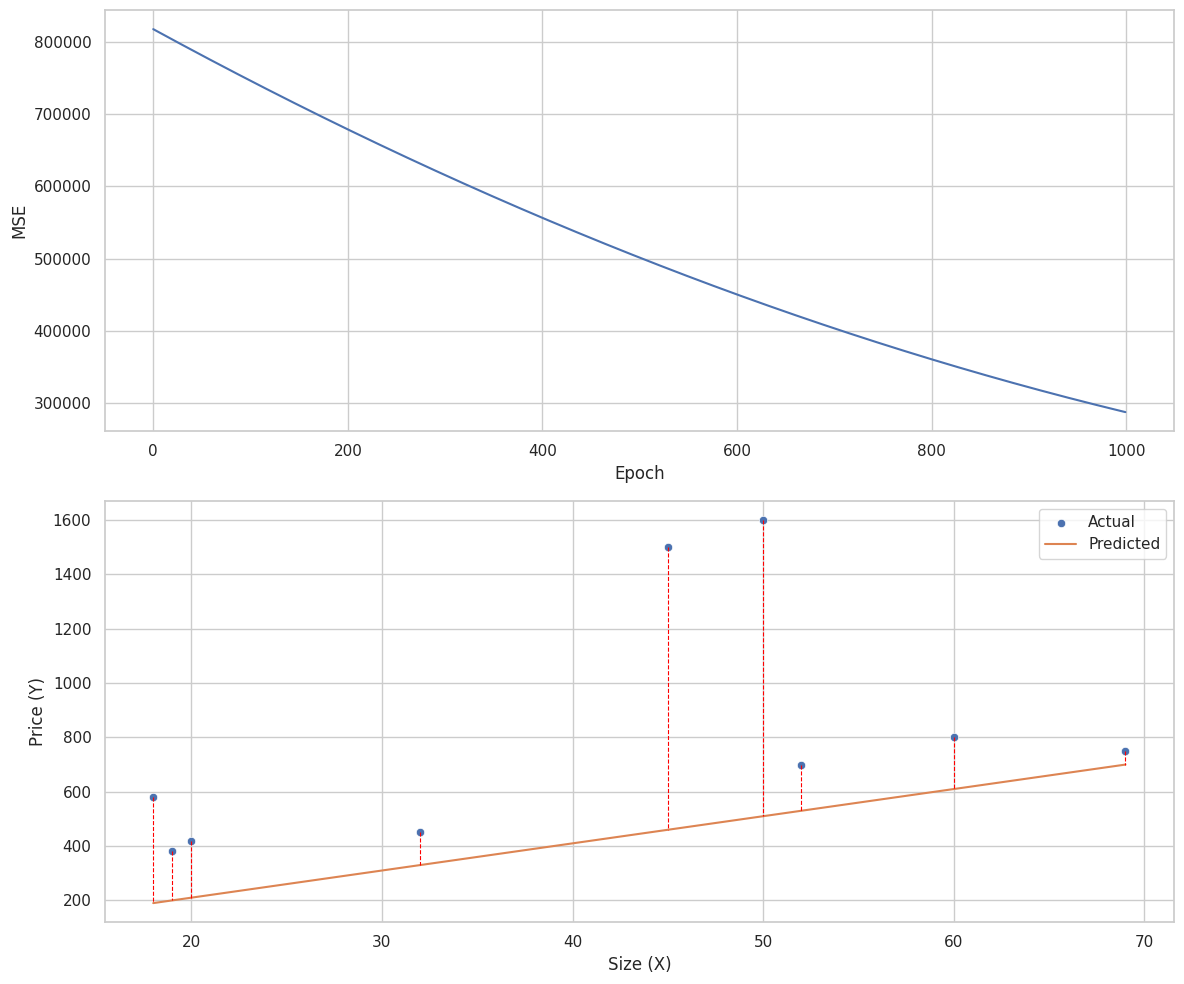

In [4]:
sns.set_theme(context="notebook")
sns.set_style("whitegrid")


# Training the model on our apartment data:
model = SimpleGradientDescentModel(learning_rate=0.01, n_iterations=1000)
model.fit(X[:,1], Y[:,0])

# Retrieve the MSE history
mse_history = model.mse_history
predictions = model.predict(X[:,1])

# Learning curve - how the error develops over training / time
fig, axes = plt.subplots(2, 1, figsize=(12,10))
sns.lineplot(mse_history, ax=axes[0])
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("MSE")
# axes[0].set_yscale("log") # Optional: Logarithmic y axis

default_palette = sns.color_palette()
sns.scatterplot(x=X[:,1], y=Y[:,0], ax=axes[1], color=default_palette[0], label="Actual")
sns.lineplot(y=predictions, x=X[:,1], ax=axes[1], color=default_palette[1], label="Predicted")

for x_val, y_true, y_pred in zip(X[:, 1], Y[:, 0], predictions):
    axes[1].plot([x_val, x_val], [y_true, y_pred], color='red', linestyle='--', linewidth=0.8)

axes[1].set_xlabel("Size (X)")
axes[1].set_ylabel("Price (Y)")

plt.tight_layout()

**Second sub-task: Gradient descent**

You should now use the real gradient -- we are interested in how the error (in our case the MSE) is changing depending on the current weights. Therefore, we can use the gradient of the error with respect to a weight and this gives us a direction in which the error would increase.

Tasks:

* Start with (small) initial values;
* Compute error for current parameters;
* Calculate gradients: Compute the partial derivatives (gradients) of the MSE with respect to $m$ (slope) and $b$ (intercept).
* Update parameters: Adjust the values of $m$ and $b$ using the gradients. The amount by which you adjust the parameters is controlled by a learning rate (start with a small value, e.g., $\alpha = 0.0001$ and run for a couple of thousand iterations).
* Repeat: Continue adjusting the parameters iteratively until the error converges to a minimum.

This approach is simpler than gradient descent but still allows you to iteratively find a better solution by trying out small adjustments to the parameters. You can fine-tune the step size and the number of iterations to balance between speed and accuracy.

*Formulae for Gradient Descent*

For linear regression, the MSE is defined as:

$$
\text{MSE}(m, b) = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i})^2
$$

Where

* $y_{\text{pred}, i} = m \cdot x_i + b$

*The partial derivatives of the cost function (MSE) are:*

* Gradient with respect to $m$ (slope): $\frac{\partial}{\partial m} = -\frac{2}{n} \sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i}) \cdot x_i$

* Gradient with respect to $b$ (intercept): $\frac{\partial}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i})$

*Gradient Descent Updates:*

The update rules for the slope $m$ and intercept $b$ are:


* $m = m - \alpha \cdot \frac{\partial}{\partial m} \text{MSE}(m, b)$

* $b = b - \alpha \cdot \frac{\partial}{\partial b} \text{MSE}(m, b)$


In [ ]:
class GradientDescentModel:
    """
    A simple linear regression model that performs gradient descent manually.
    It loops over each example, adjusts the slope (m) and intercept (b),
    and calculates the gradient manually to update the parameters.
    """

    def __init__(self, learning_rate=0.0001, n_iterations=1000):
        self.slope = 0.1  # Initialize slope (m) to 0
        self.intercept = 0.1  # Initialize intercept (b) to 0
        self.learning_rate = learning_rate  # Set learning rate for gradient descent
        self.n_iterations = n_iterations  # Set number of iterations for gradient descent
        self.mse_history = []  # List to store MSE at each iteration

    def fit(self, X, y):
        """
        Fit the model using gradient descent. Adjust slope and intercept iteratively.

        Parameters:
        X : list or array-like, shape (n_samples,)
            The independent variable (e.g., size of apartments).
        y : list or array-like, shape (n_samples,)
            The dependent variable (e.g., price of apartments).
        """
        n = len(X)

        for i in range(self.n_iterations):
            # Calculate Mean Squared Error for the current iteration and store it
            self.mse_history.append(mean_squared_error(y_pred=self.predict(X), y_true=y))


            # Gradients are iteratively added up and then normalized later
            gradient_slope = 0.
            gradient_intercept = 0.
            for j in range(n):
                y_pred = self.slope * X[j] + self.intercept

                gradient_slope += -2 * (y[j] - y_pred) * X[j]
                gradient_intercept += -2 * (y[j] - y_pred)

            # Normalize the sum
            gradient_intercept /= n
            gradient_slope /= n

            self.slope -= self.learning_rate * gradient_slope
            self.intercept -= self.learning_rate * gradient_intercept


             # Every 100 epochs, print MSE and params
            if i % 100 == 0:
                print(f"Iteration {i:4}: MSE = {self.mse_history[-1]}, m = {self.slope}, b = {self.intercept}")



    def fit_vector(self, X, y):
        """
        Fit the model using gradient descent. Adjust slope and intercept iteratively.

        Parameters:
        X : list or array-like, shape (n_samples,)
            The independent variable (e.g., size of apartments).
        y : list or array-like, shape (n_samples,)
            The dependent variable (e.g., price of apartments).
        """
        n = len(X)  # Number of data points

        for i in range(self.n_iterations):
            # TODO B - LATER PART OF TASK AFTER THE FIRST VERSION IS RUNNING AND EVALUATED
            # For stabler gradient updates we collect information on many samples
            # - these are simply all integrated in gradient slope and
            # afterwards we calculate the mean
            # You can start with experimenting first in the loop  and collecting the values in these
            # or simply calculate these directly ...
            

            # TODO B - basically adapt your code from above, without the loop index and sum all the gradients (np.sum() -
            # and don't forget to divide by the number of summed gradients)

            # Initial prediction using current m and b
            y_pred = self.slope * X + self.intercept

            # Calculate Mean Squared Error for the current iteration and store it
            self.mse_history.append(mean_squared_error(y_pred=y_pred, y_true=y))

            # Calculate the gradients for slope and intercept
            gradient_slope = (-2 / n) * np.sum((y - y_pred) * X)  # Gradient w.r.t. m
            gradient_intercept = (-2 / n) * np.sum(y - y_pred)        # Gradient w.r.t. b

            # Update the slope and intercept using the gradients
            self.slope -= self.learning_rate * gradient_slope
            self.intercept -= self.learning_rate * gradient_intercept

            # Every 100 epochs, print MSE and params
            if i % 100 == 0:
                print(f"Iteration {i:4}: MSE = {self.mse_history[-1]}, m = {self.slope}, b = {self.intercept}")


    def predict(self, X):
        """
        Predict method for making predictions using the trained model.

        Parameters:
        X : list or array-like, shape (n_samples,)
            New data (independent variable) to predict the dependent variable.

        Returns:
        predictions : list
            Predicted values based on the model's slope and intercept.
        """
        return [self.slope * x + self.intercept for x in X]
    
    def get_mse_history(self):
        return self.mse_history


Use your code for visualization from above. Important: for gradient descent the learning rate is usually a quite sensitive parameter.

* Start initially with a very small value `(learning_rate=0.000005, n_iterations=100)`. What is the disadavantage of a small learning rate?
* Try slightly increasing the learning rate -- when is this breaking down and what do you observe when getting close to that learning rate?

#### Numpy Array Approach (TODO B)

In the code above there is a second fit method -- `fit_vector`. You should implement this now: the task is to remove the for iteration over the training and make this more efficient. But in addition, we are not updating the weights after every single example and change them. Instead, we calculate in a way over the training data set for each example a suggestion in which direction and how much the gradients should be moved and only in the end find a consensus.

Consider, how computing whole batches for a gradient update improves training:

* again, test different learning rates
* observe how training progresses and compare to using updates after each single sample.

Further analysis:

* Try for a good learning rate (fast learning and stable), try different initial values for the weights. What changes?
* Can you find initial values that break again learning?
* How do you explain this? Why is the system "sometimes" diverging?

Iteration    0: MSE = 810680.7088888889, m = 3.6811511111111113, b = 0.17936222222222226
Iteration  100: MSE = 158441.566262094, m = 18.291656900154294, b = 1.030571079534313
Iteration  200: MSE = 158381.3150328018, m = 18.280339404861756, b = 1.5793156487473317
Iteration  300: MSE = 158321.26058658972, m = 18.269040401928862, b = 2.1271633734227064
Iteration  400: MSE = 158261.40228075592, m = 18.257759865598807, b = 2.674115719416564
Iteration  500: MSE = 158201.73947469762, m = 18.246497765690574, b = 3.2201741500971868
Iteration  600: MSE = 158142.27152990422, m = 18.235254072072472, b = 3.7653401264411888
Iteration  700: MSE = 158082.99780995044, m = 18.224028754662047, b = 4.3096151070374304
Iteration  800: MSE = 158023.91768048983, m = 18.21282178342603, b = 4.853000548090914
Iteration  900: MSE = 157965.03050924747, m = 18.201633128380216, b = 5.395497903426682
Fitting iteratively took 0.03152s
Iteration    0: MSE = 810680.7088888889, m = 3.681151111111111, b = 0.17936222222222

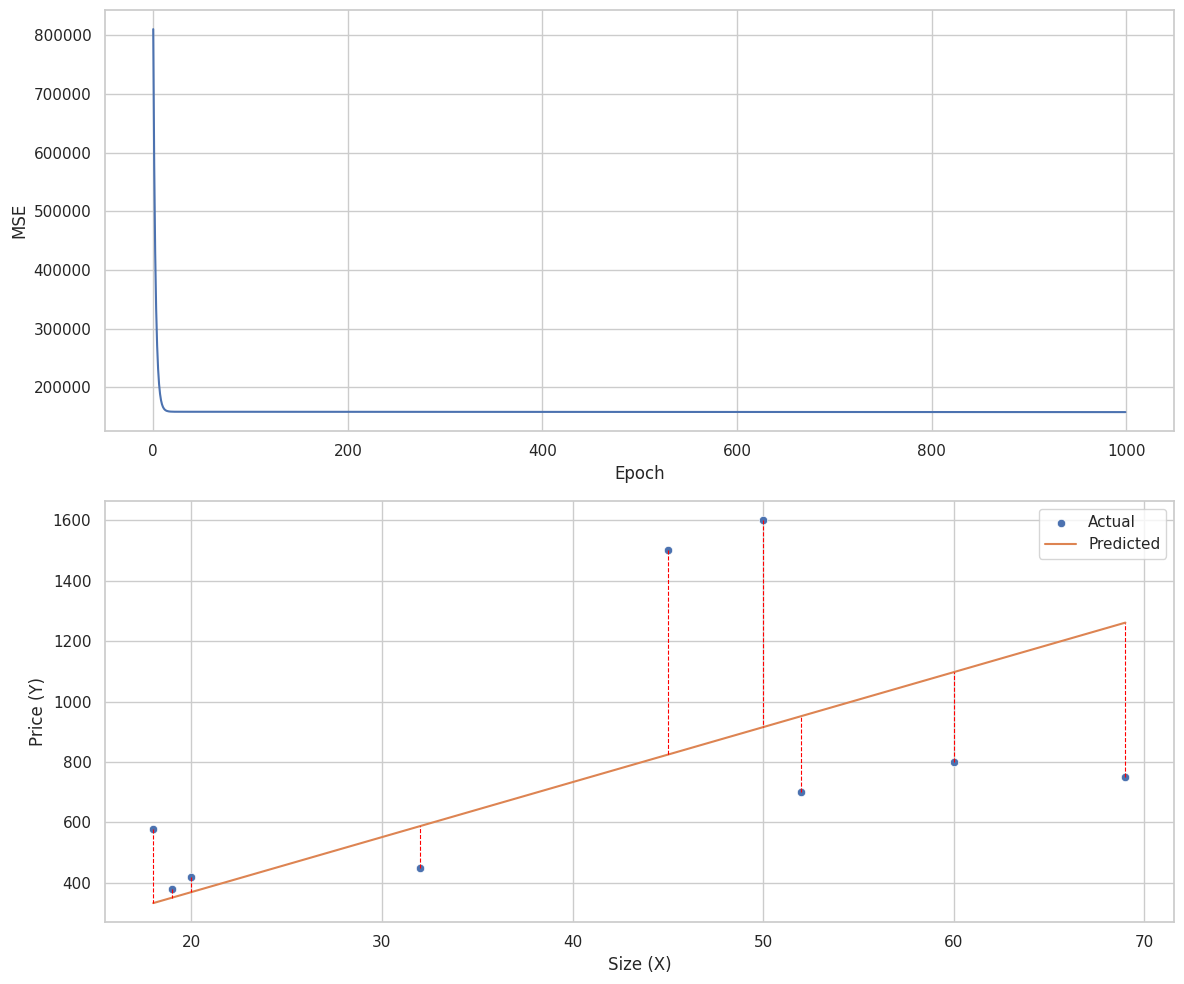

In [6]:
from time import time

# Training the model on our apartment data:
lr = 0.00005
n_iterations = 1000

start_t = time()
model = GradientDescentModel(learning_rate=lr, n_iterations=n_iterations)
model.fit(X[:,1], Y[:,0])
print(f"Fitting iteratively took {time()-start_t:.5f}s")

start_t = time()
model2 = GradientDescentModel(learning_rate=lr, n_iterations=n_iterations)
model2.fit_vector(X[:,1], Y[:,0])
print(f"Fitting vectorized took {time()-start_t:.5f}s")

# Retrieve the MSE history
mse_history = model.mse_history
predictions = model.predict(X[:,1])

fig, axes = plt.subplots(2, 1, figsize=(12,10))
sns.lineplot(mse_history, ax=axes[0])
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("MSE")
# axes[0].set_yscale("log") # Optional: Logarithmic y axis

default_palette = sns.color_palette()
sns.scatterplot(x=X[:,1], y=Y[:,0], ax=axes[1], color=default_palette[0], label="Actual")
sns.lineplot(y=predictions, x=X[:,1], ax=axes[1], color=default_palette[1], label="Predicted")

for x_val, y_true, y_pred in zip(X[:, 1], Y[:, 0], predictions):
    axes[1].plot([x_val, x_val], [y_true, y_pred], color='red', linestyle='--', linewidth=0.8)

axes[1].set_xlabel("Size (X)")
axes[1].set_ylabel("Price (Y)")

plt.tight_layout()


---

## 2.2 Multi-dimensional model

Adapt your class from above and use two input dimensions (X is a stacked input version -- check if this is still the case). A third dimension is the bias for which a constant of `1` was added to each entry (at index 0).

Now build a class GradientDescentModel_vector that deals with numpy array operations (only the outer iterations loop) is still used.

In [ ]:
class GradientDescentModel_vector:
    """
    A linear regression model with gradient descent that handles multiple input dimensions.
    The input X is expected to have a bias column (1s) as the first column.
    """

    def __init__(self, learning_rate=0.0001, n_iterations=1000):
        self.learning_rate = learning_rate  # Set learning rate for gradient descent
        self.n_iterations = n_iterations  # Set number of iterations for gradient descent
        self.weights = None  # Weights vector (including bias weight)
        self.mse_history = []  # List to store MSE at each iteration

    def fit(self, X, y):
        """
        Fit the model using gradient descent. Adjust weights (including bias) iteratively.

        Parameters:
        X : numpy array, shape (n_samples, n_features)
            The independent variables with an additional bias column (first column is all 1s).
        y : numpy array, shape (n_samples,)
            The dependent variable (e.g., price of apartments).
        """
        n, d = X.shape  # n is number of samples, d is number of features (including bias)

        # Initialize weights (d values, one for each feature including the bias)
        self.weights = np.zeros(d)

        for i in range(self.n_iterations):
            # Make predictions using the current weights
            y_pred = X @ self.weights # Matrix-vector multiplication for predictions

            # TODO: Calculate the gradient for the weights (including the bias)
            gradient =  (-2 / n) * ((y - y_pred) @ X) # Gradient vector (same length as weights)

            # Update the weights using the gradient
            self.weights -= self.learning_rate * gradient

            # Calculate Mean Squared Error for the current iteration and store it
            mse = mean_squared_error(y, y_pred)
            self.mse_history.append(mse)

            # Optionally, print the status every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i:4}: MSE = {self.mse_history[-1]:.4f}")


    def predict(self, X):
        """
        Predict method for making predictions using the trained model.

        Parameters:
        X : numpy array, shape (n_samples, n_features)
            New data (independent variables with bias term as the first column).

        Returns:
        predictions : numpy array
            Predicted values based on the model's weights.
        """
        return X.dot(self.weights)  # Matrix-vector multiplication for predictions
    
    def get_mse_history(self):
        return self.mse_history


Again, use your code for visualization from above. As we are now considering multiple input dimension, this doesn't lead to a single straight line anymore, but we are seeing projections onto individual planes.

* For a line representation, order the sequence of inputs along the specific input dimension (is already done for first dimension below)
* Extend it towards a second input dimension.

Consider, how computing whole batches for a gradient update improves training:

* Compare the predictions with the simpler model.
* Learn for a longer time -- and test again different learning rates.

Iteration    0: MSE = 818022.2222
Iteration  100: MSE = 158528.9582
Iteration  200: MSE = 154297.3539
Iteration  300: MSE = 153115.8798
Iteration  400: MSE = 152138.5794
Iteration  500: MSE = 151247.7632
Iteration  600: MSE = 150401.3890
Iteration  700: MSE = 149582.9149
Iteration  800: MSE = 148785.6912
Iteration  900: MSE = 148006.9140
Iteration 1000: MSE = 147245.2778
Iteration 1100: MSE = 146500.0633
Iteration 1200: MSE = 145770.7838
Iteration 1300: MSE = 145057.0467
Iteration 1400: MSE = 144358.5009
Iteration 1500: MSE = 143674.8153
Iteration 1600: MSE = 143005.6705
Iteration 1700: MSE = 142350.7564
Iteration 1800: MSE = 141709.7697
Iteration 1900: MSE = 141082.4140
Iteration 2000: MSE = 140468.3995
Iteration 2100: MSE = 139867.4425
Iteration 2200: MSE = 139279.2651
Iteration 2300: MSE = 138703.5957
Iteration 2400: MSE = 138140.1682
Iteration 2500: MSE = 137588.7224
Iteration 2600: MSE = 137049.0034
Iteration 2700: MSE = 136520.7619
Iteration 2800: MSE = 136003.7537
Iteration 2900

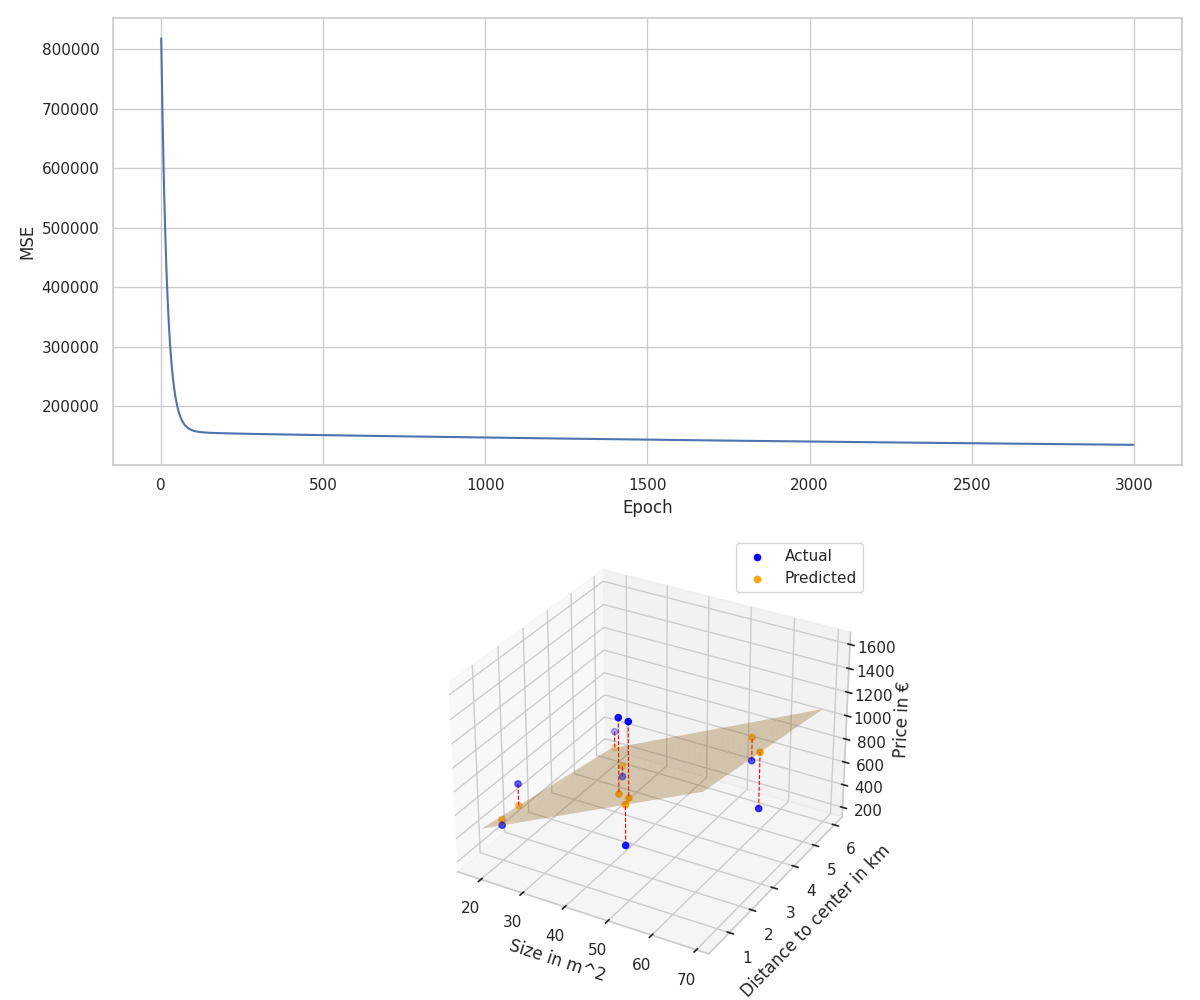

In [8]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

# Create and train the model
model = GradientDescentModel_vector(learning_rate=0.0005, n_iterations=3000)
model.fit(X, Y[:, 0])  # Fit the model

# Retrieve the MSE history and predictions
mse_history = model.mse_history
predictions = model.predict(X)

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
sns.lineplot(mse_history, ax=ax1)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("MSE")

ax2 = fig.add_subplot(212, projection="3d")
# Extract the two input features
x1 = X[:, 1]
x2 = X[:, 2]
y_actual = Y[:, 0]
y_pred = predictions

# Scatter plot of actual values
ax2.scatter(x1, x2, y_actual, color='blue', label='Actual')

# Line plot of predicted values (as points; line doesn't make sense unless ordered)
ax2.scatter(x1, x2, y_pred, color='orange', label='Predicted')

# Connect actual and predicted points with a dashed line
for x_val1, x_val2, y_true, y_hat in zip(x1, x2, y_actual, y_pred):
    ax2.plot([x_val1, x_val1], [x_val2, x_val2], [y_true, y_hat], color='red', linestyle='--', linewidth=0.8)

ax2.set_xlabel("Size in m^2")
ax2.set_ylabel("Distance to center in km")
ax2.set_zlabel("Price in €")
ax2.legend()

# Create a meshgrid for the surface
x1_range = np.linspace(x1.min(), x1.max(), 30)
x2_range = np.linspace(x2.min(), x2.max(), 30)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Compute corresponding y values using the learned model
# model.m[1] and model.m[2] correspond to the weights for x1 and x2
y_grid = model.weights[1] * x1_grid + model.weights[2] * x2_grid + model.weights[0]

# Plot the regression plane
ax2.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.3, color='orange', label='Model plane', linewidth=0)


plt.tight_layout()

### 3D Visualization of fitted linear model

Below is an example how to visualize a 3D plane in matplotlib.

* Adapt it to visualize the plane spanned by the model,
* plot the real data points and
* include dotted lines indicating the error for the data.

For more information on parameters for 3D plotting see the [documentation of matplotlib](https://matplotlib.org/stable/gallery/mplot3d/index.html).

---

# 2.3 Finding the Optimal Values Analytically for Simple Linear Regression

In this task, you are required to compute the optimal slope $(m)$ and intercept $(b)$ analytically for a simple linear regression problem (we are starting with the simple one dimensional input case again). Instead of using iterative methods like gradient descent or brute-force optimization, you will directly calculate the values of
$m$ and $b$ that minimize the Mean Squared Error (MSE) using closed-form solutions.

**Overview:**

For simple linear regression, the relationship between the independent variable $(x)$ (e.g., apartment size) and the dependent variable $(y)$ (e.g., price) is modeled as:
$$
y = m \cdot x + b
$$

Where:
- $m$ is the slope (or coefficient) that determines how much $y$ changes as $x$ changes.
- $b$ is the intercept, which is the value of $y$ when $x = 0$.

The goal is to find the values of $m$ and $b$ that minimize the *Mean Squared Error (MSE)*. This can be done analytically using the following closed-form equations.

Try to find the analytical solution -- i.e. for a given function you are searching for local optima (characterized by gradients that equal zero).

**Analytical Solutions for $m$ and $b$:**

The optimal slope \(m\) and intercept \(b\) for linear regression can be found using the *least squares method*:

1. *Optimal Slope ($m$)*:
$$
   m = \frac{n \sum x_i y_i - \sum x_i \sum y_i}{n \sum x_i^2 - \left( \sum x_i \right)^2}
$$

Where:

* $n$ is the number of data points.
* $\sum x_i y_i$ is the sum of the products of $x_i$ and $y_i$.
* $\sum x_i$ is the sum of the $x$-values.
* $\sum y_i$ is the sum of the $y$-values.
* $\sum x_i^2$ is the sum of the squared $x$-values.

2. *Optimal Intercept ($b$)*:
$$
   b = \frac{\sum y_i - m \sum x_i}{n}
$$

Where $m$ is the slope computed from the formula above.

**Task Instructions:**

1. Compute the sums required for the formulae above.
2. Use the formulae provided above to compute the optimal slope $m$ and intercept $b$.
3. Once you have the analytical solutions for $m$ and $b$, use them to predict $y$-values for any given $x$-values (e.g., apartment sizes) and compare the predictions with the actual prices.
4. Calculate the Mean Squared Error (MSE) for these predictions to verify that the analytically computed values for $m$ and $b$ minimize the error.

In [5]:
class OptimalLinearModel:
    """
    A simple linear regression model that directly calculates the optimal slope and intercept
    using the closed-form solution (normal equation) for simple linear regression.
    """

    def __init__(self):
        self.slope = None  # Initialize slope (m)
        self.intercept = None  # Initialize intercept (b)

    def fit(self, X, y):
        """
        Fit the model by directly calculating the optimal slope and intercept.
        Parameters:
        X : list or array-like, shape (n_samples,)
            The independent variable (e.g., size of apartments).
        y : list or array-like, shape (n_samples,)
            The dependent variable (e.g., price of apartments).
        """
        n = len(X)  # Number of data points

        # Pre-compute the sums for reuse
        sum_x = np.sum(X)
        sum_x_sq = np.sum(X ** 2)
        sum_y = np.sum(y)
        sum_xy = np.sum(X * y)

        # Calculate the slope (m) using the closed-form solution
        self.slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x_sq  - sum_x ** 2)
        
        # Calculate the intercept (b)
        self.intercept = (sum_y - self.slope * sum_x) / n


    def predict(self, X):
        """
        Predict method for making predictions using the trained model.

        Parameters:
        X : list or array-like, shape (n_samples,)
            New data (independent variable) to predict the dependent variable.

        Returns:
        predictions : list
            Predicted values based on the model's slope and intercept.
        """
        return [self.slope * x + self.intercept for x in X]

    def mse(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y_pred, y)
        return mse


And we finally calculate the optimal values -- and visualize this optimal linear model (optimal in the sense that it minimizes MSE).

Remarks on optimal solution:

* No Iterative Updates: The weights are computed directly using the normal equation, which gives the optimal solution in one step.
* Efficient for Small Data: This approach works well for small datasets.
* But: computing the inverse of large matrices can be computationally expensive for large datasets.
* Accurate: The normal equation provides the exact solution, so there is no need for tuning parameters like the learning rate or number of iterations.


MSE:  139993.78799116772


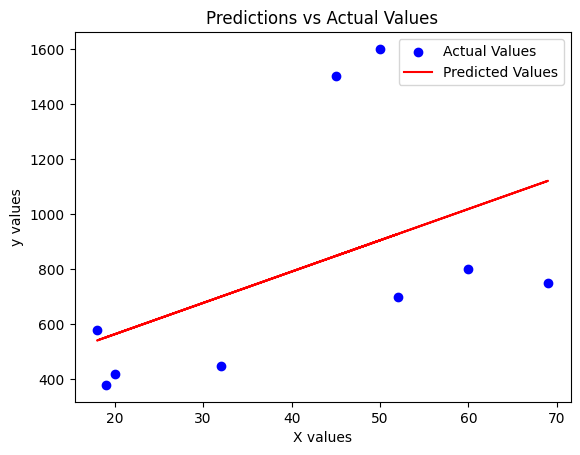

In [6]:
# Fit the optimal model
model = OptimalLinearModel()
model.fit(X[:,1], Y[:,0])

# Retrieve the MSE history
predictions = model.predict(X[:,1])
print("MSE: ", model.mse(X[:,1], Y[:,0]))

# Assume you have predicted values and actual values
plt.scatter(X[:,1], Y[:,0], color='blue', label='Actual Values')
plt.plot(X[:,1], predictions, color='red', label='Predicted Values')
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()


### Optimal Solution for multidimensional case

In this version of the linear regression model, we are using the **Normal Equation** to directly compute the optimal weights for a multivariate linear regression problem. The **Normal Equation** provides a closed-form solution for the parameters (weights), avoiding the need for iterative optimization methods like gradient descent.

### Task List:
- **Input Representation**: The input matrix $\mathbf{X}$ is expected to have a bias column of ones as the first column, with subsequent columns representing the features.
- **Weights Calculation**: The optimal weights $\mathbf{w}$ are calculated using the following formula:
  $$
  \mathbf{w} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
  $$
- **Prediction**: Once the weights are calculated, the prediction for any new data $\mathbf{X}_{\text{new}}$ is done using matrix-vector multiplication:
  $$
  \hat{\mathbf{y}} = \mathbf{X}_{\text{new}} \mathbf{w}
  $$


In [12]:
class OptimalLinearModel_vector:
    """
    A linear regression model that directly calculates the optimal weights
    using the normal equation (closed-form solution) for multiple input dimensions.
    The input X is expected to have a bias column (1s) as the first column.
    """

    def __init__(self):
        self.weights = None  # Weights vector (including bias weight)

    def fit(self, X, y):
        """
        Fit the model by directly calculating the optimal weights using the normal equation.

        Parameters:
        X : numpy array, shape (n_samples, n_features)
            The independent variables with an additional bias column (first column is all 1s).
        y : numpy array, shape (n_samples,)
            The dependent variable (e.g., price of apartments).
        """
        # Compute the optimal weights using the normal equation
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        """
        Predict method for making predictions using the trained model.

        Parameters:
        X : numpy array, shape (n_samples, n_features)
            New data (independent variables with bias term as the first column).

        Returns:
        predictions : numpy array
            Predicted values based on the model's weights.
        """
        return X.dot(self.weights)  # Matrix-vector multiplication for predictions

    def mse(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y_pred, y)
        return mse


Again, we use code from above for visualization.

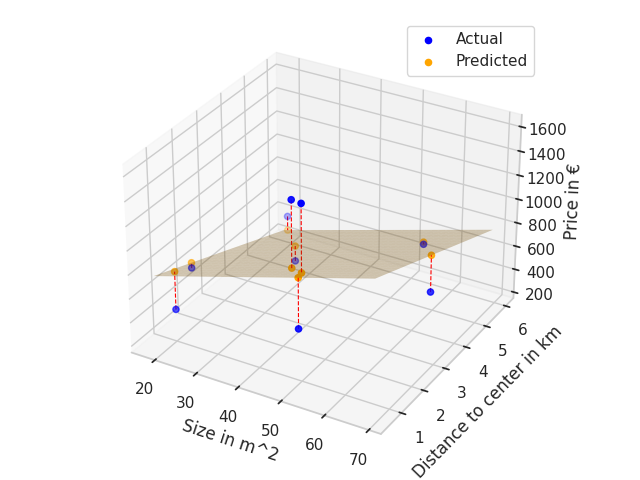

In [13]:
%matplotlib widget


# Create and train the model
model = OptimalLinearModel_vector()
model.fit(X, Y[:, 0])  # Fit the model

predictions = model.predict(X)


from mpl_toolkits.mplot3d import Axes3D

# Create a figure for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
# Extract the two input features
x1 = X[:, 1]
x2 = X[:, 2]
y_actual = Y[:, 0]
y_pred = predictions

# Scatter plot of actual values
ax.scatter(x1, x2, y_actual, color='blue', label='Actual')

# Line plot of predicted values (as points; line doesn't make sense unless ordered)
ax.scatter(x1, x2, y_pred, color='orange', label='Predicted')

# Connect actual and predicted points with a dashed line
for x_val1, x_val2, y_true, y_hat in zip(x1, x2, y_actual, y_pred):
    ax.plot([x_val1, x_val1], [x_val2, x_val2], [y_true, y_hat], color='red', linestyle='--', linewidth=0.8)

ax.set_xlabel("Size in m^2")
ax.set_ylabel("Distance to center in km")
ax.set_zlabel("Price in €")
ax.legend()

# Create a meshgrid for the surface
x1_range = np.linspace(x1.min(), x1.max(), 30)
x2_range = np.linspace(x2.min(), x2.max(), 30)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Compute corresponding y values using the learned model
y_grid = model.weights[1] * x1_grid + model.weights[2] * x2_grid + model.weights[0]

# Plot the regression plane
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.3, color='orange', label='Model plane', linewidth=0)


plt.tight_layout()


## Final Remarks / Check for your Understanding

Briefly check your understanding of:

* the learning curve
* the learning rate
    * How to find an optimal one? And what does optimal mean?
    * What can happen with a learning rate that is too high or too low?
    * To avoid long learning times -- what could you improve in the approach?
* the choice of initial values

Further questions:

* Do you have an idea and can explain why gradient descent sometimes diverges and goes off rails?
* What is a disadvantage of the analytical optimization approach?
* How would you handle multiple output values (there is one further output given)?
* Which is the best approach? And in what sense?
* What are we actually measuring -- and what would we have to do to measure generalization?

<div style="text-align: right;">
<i>This notebook has been created with the help of ChatGPT-4, 15.10.2024; Explanations were initially generated and afterwards edited;</i>
</div>